# NEPAL GIS EDA Assignments

In [29]:
#installing all the required libraries

In [ ]:
pip install -r "requirements.txt"

In [52]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
import numpy as np
from rasterio.mask import mask
import fiona

In [32]:
# Path of the shape file
path = "datas/vector/Shape_Data/local_unit.shp"
# Loading the shape file
gdf = gpd.read_file(path)

In [33]:
gdf

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."
...,...,...,...,...,...,...
772,4,NAWALPARASI_E,Chitawan National Park,National Park,Gandaki,"POLYGON ((84.32537 27.68957, 84.32562 27.6894,..."
773,5,RUKUM_E,Bhume,Gaunpalika,5,"POLYGON ((82.65382 28.65759, 82.65428 28.65724..."
774,5,RUKUM_E,Putha Uttarganga,Gaunpalika,5,"POLYGON ((82.76718 28.80407, 82.76748 28.80383..."
775,5,RUKUM_E,Sisne,Gaunpalika,5,"POLYGON ((82.67327 28.85214, 82.67373 28.85205..."


In [34]:
# Checking the basic informations
print("Head:: \n" , gdf.head())
print("\nCRS:: \n" , gdf.crs)
print("\nGeometry:: \n", gdf.geometry)

Head:: 
    STATE_CODE   DISTRICT        GaPa_NaPa     Type_GN Province  \
0           1  TAPLEJUNG  Aathrai Tribeni  Gaunpalika        1   
1           1  TAPLEJUNG       Maiwakhola  Gaunpalika        1   
2           1  TAPLEJUNG        Meringden  Gaunpalika        1   
3           1  TAPLEJUNG       Mikwakhola  Gaunpalika        1   
4           1  TAPLEJUNG     Phaktanglung  Gaunpalika        1   

                                            geometry  
0  POLYGON ((87.60985 27.37043, 87.61107 27.36943...  
1  POLYGON ((87.50402 27.42901, 87.50672 27.42831...  
2  POLYGON ((87.51272 27.56894, 87.51255 27.56859...  
3  POLYGON ((87.6885 27.70975, 87.68891 27.70938,...  
4  POLYGON ((87.83673 27.95137, 87.83735 27.95119...  

CRS:: 
 GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHEROID["Everest 1830 (1937 Adjustment)",6377276.345,300.8017,AUTHORITY["EPSG","7015"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]

Geometry:: 
 0 

# Pre Data Processing


In [35]:
# Checking the quality of data
print(gdf.isnull().sum()) # Counting the missing values in each columns

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64


In [36]:
print(gdf.describe())  # Numeric columns summary

       STATE_CODE
count  777.000000
mean     3.651223
std      2.000799
min      1.000000
25%      2.000000
50%      3.000000
75%      5.000000
max      7.000000


In [37]:
print(gdf["STATE_CODE"].value_counts().sort_index())

STATE_CODE
1    139
2    140
3    124
4     89
5    113
6     79
7     93
Name: count, dtype: int64


# Visualization

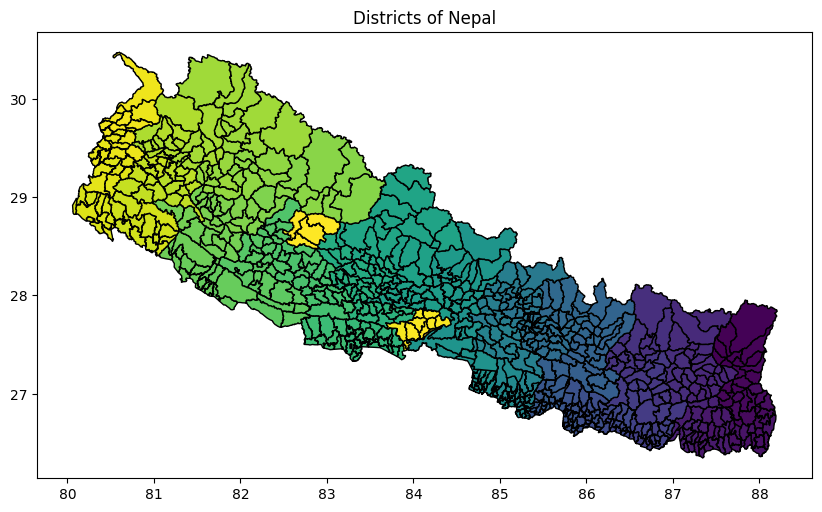

In [38]:
# plotting the GIS data of Nepal
gdf.plot(figsize=(10, 6), cmap="viridis", edgecolor="black")
plt.title("Districts of Nepal")
plt.show()

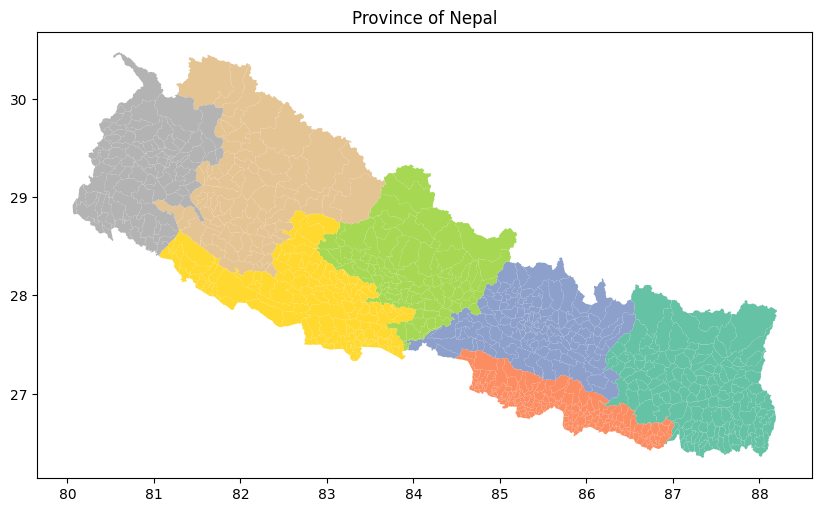

In [39]:
# Plot by State Code
gdf.plot(column="STATE_CODE", cmap="Set2", legend=False, figsize=(10, 6))
plt.title("Province of Nepal")
plt.show()

# Loading a raster file

In [40]:
# loading raster file
raster_precipitation_path_2020 = "datas/rastar/nepal_climate_data/nepal_precipitation_2020.tif"
raster_precipitation_path_2050 = "datas/rastar/nepal_climate_data/nepal_precipitation_2050.tif"
raster_temperature_path_2020 = "datas/rastar/nepal_climate_data/nepal_temperature_2020.tif"
raster_temperature_path_2050 = "datas/rastar/nepal_climate_data/nepal_temperature_2050.tif"


In [41]:
# Function to load raster image
def read_raster(path):
	with rasterio.open(path) as src:
		raster_src = src.read(1)
		profile = src.profile

	return raster_src, profile

In [42]:
temp_2020, temp_profile_2020 = read_raster(raster_temperature_path_2020)
temp_2050, temp_profile_2050 = read_raster(raster_temperature_path_2050)
precip_2020, precip_profile_2020 = read_raster(raster_precipitation_path_2020)
precip_2050, precip_profile_2050 = read_raster(raster_precipitation_path_2050)

# Visualize with raster data 

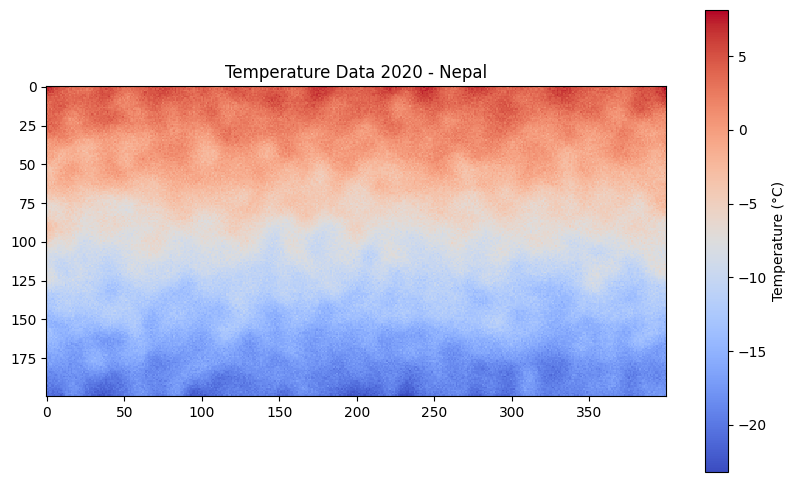

In [70]:
# Basic Visualization of Nepal temperature for 2020

plt.figure(figsize=(10, 6))
plt.imshow(temp_2020, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Temperature Data 2020 - Nepal")
plt.show()


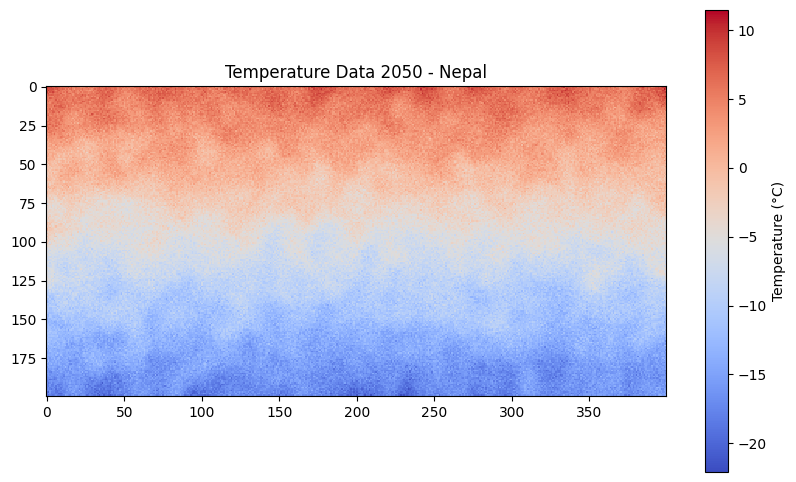

In [69]:
# Basic Visualization of Nepal temperature for 2050

plt.figure(figsize=(10, 6))
plt.imshow(temp_2050, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Temperature (°C)")
plt.title("Temperature Data 2050 - Nepal")
plt.show()


#### Mask raster with the vector file (Nepal boundaries)


In [72]:
# Extract the first band# Mask raster with the vector file (Nepal boundaries)
def mask_raster(raster_path, vector_path):
    with fiona.open(vector_path, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]  # Read vector geometry

    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shapes, crop=True)  # Mask raster
        out_image = out_image[0]  # Extract the first band

    return out_image

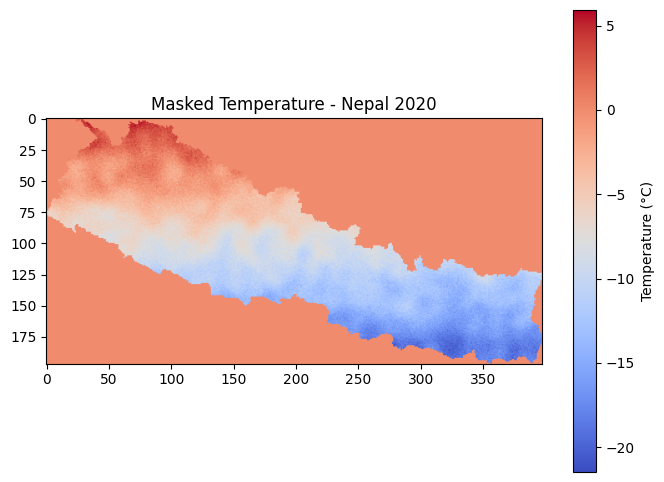

In [ ]:
# Apply masking Temperature 2020
mask_temp_2020 = mask_raster(raster_temperature_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2020, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2020")
plt.colorbar(label="Temperature (°C)")
plt.show()

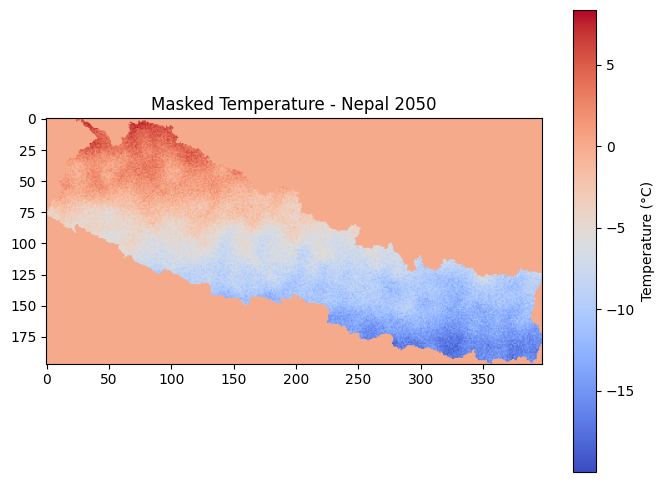

In [ ]:
# Apply masking 2050 Temperature
mask_temp_2050 = mask_raster(raster_temperature_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_temp_2050, cmap="coolwarm")
plt.title("Masked Temperature - Nepal 2050")
plt.colorbar(label="Temperature (°C)")
plt.show()

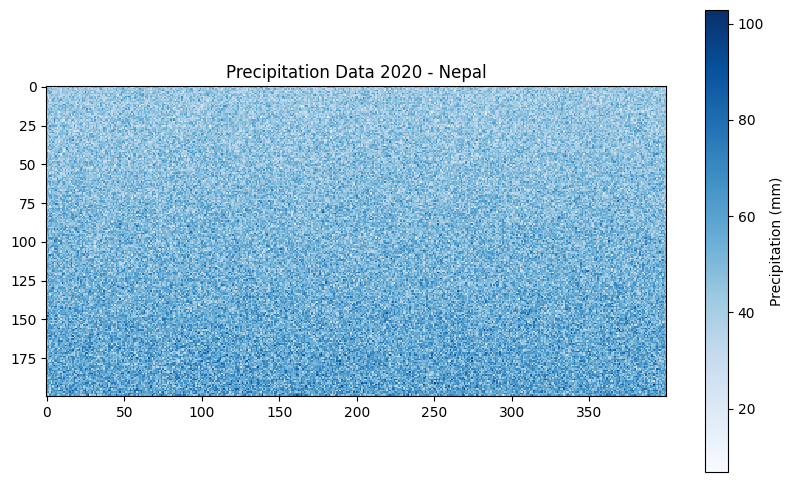

In [75]:
# Basic Visualization of Nepal Precipitation for 2020

plt.figure(figsize=(10, 6))
plt.imshow(precip_2020, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2020 - Nepal")
plt.show()


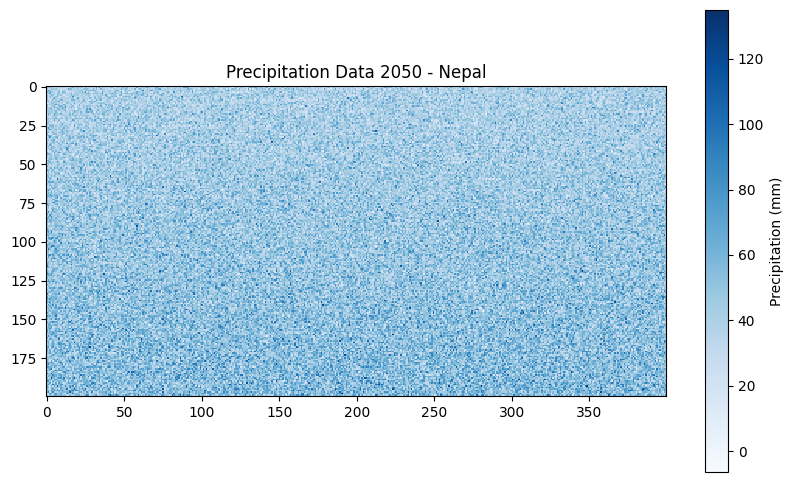

In [76]:
# Basic Visualization of Nepal Precipitation for 2020

plt.figure(figsize=(10, 6))
plt.imshow(precip_2050, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Precipitation (mm)")
plt.title("Precipitation Data 2050 - Nepal")
plt.show()


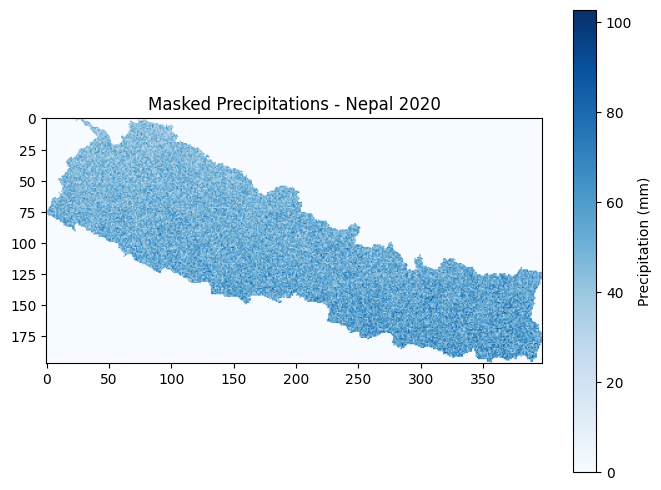

In [81]:
# Apply masking 2020 Precipitaiton
mask_precip_2020 = mask_raster(raster_precipitation_path_2020, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2020, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2020")
plt.colorbar(label="Precipitation (mm)")
plt.show()

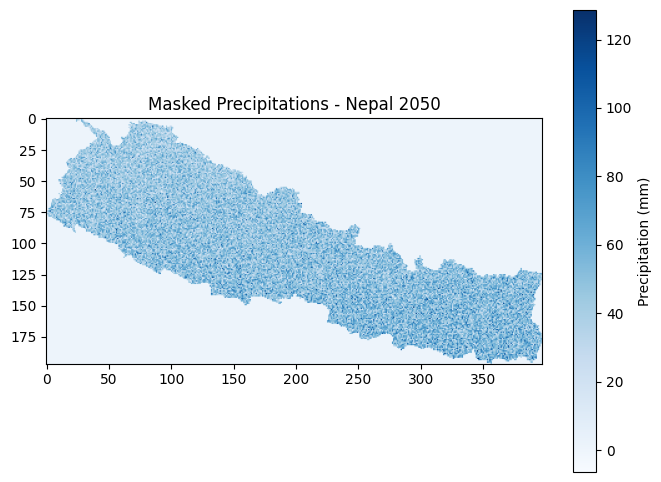

In [82]:
# Apply masking 2050 Precipitaiton
mask_precip_2050 = mask_raster(raster_precipitation_path_2050, path)

# Plot the masked raster
plt.figure(figsize=(8, 6))
plt.imshow(mask_precip_2050, cmap="Blues")
plt.title("Masked Precipitations - Nepal 2050")
plt.colorbar(label="Precipitation (mm)")
plt.show()